### Modeling

In [128]:
import pandas as pd
import numpy as np

In [129]:
disney_df = pd.read_csv("DisneylandReviews.csv", encoding='latin-1')

In [130]:
disney_df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [131]:
disney_df = disney_df.dropna(axis=0) #remove all null values

In [132]:
disney_df.drop_duplicates() #remove all duplicates

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...,...,...
42651,1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris
42652,1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris
42653,1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris
42654,1618637,4,missing,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris


In [133]:

# Remove all "missing" values
disney_df = disney_df[disney_df.Review_ID != "missing"]
disney_df = disney_df[disney_df.Rating != "missing"]
disney_df = disney_df[disney_df.Year_Month != "missing"]
disney_df = disney_df[disney_df.Reviewer_Location != "missing"]
disney_df = disney_df[disney_df.Review_Text != "missing"]
disney_df = disney_df[disney_df.Branch != "missing"]

In [134]:
# Create "Year" column with just the year of the review
disney_df['Year'] = disney_df.Year_Month.str[:4]


In [135]:
# Create the "Month" column with just the month of the review
disney_df['Month'] = disney_df.Year_Month.str[5:]

In [136]:
import seaborn as sns

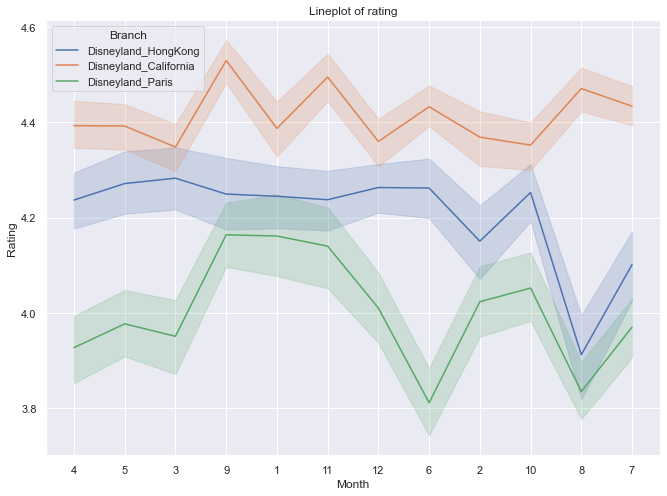

In [137]:
sns.lineplot(data = disney_df, x = "Month", y = "Rating", hue = "Branch").set(title = "Lineplot of rating");

In [138]:
!pip install wordcloud

from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [139]:
text = " ".join(i for i in disney_df.Review_Text)

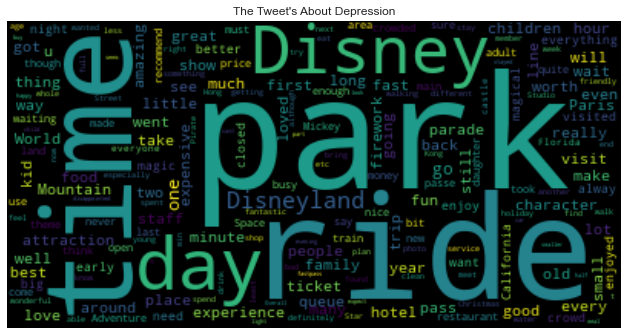

In [140]:
wordcloud = WordCloud(
    collocations=False).generate(text)

plt.figure(figsize=[11,11])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("The Tweet's About Depression")
plt.show()

In [143]:
print("\n",
      "\n",text.count("disney"),
      "\n",text.count("park"),
      "\n",text.count("ride"),
      "\n",text.count("day"),
      "\n",text.count("time"),
      "\n",text.count("disneyland"),
      "\n",text.count("great"),
      "\n",text.count("really"),
      "\n",text.count("children"),
      "\n",text.count("minute"),
     )


 
 5122 
 47879 
 48660 
 44364 
 37897 
 1781 
 13930 
 10814 
 7692 
 7713


In [144]:
data = {
    "title": ["disney", "park" ,"ride", "day", "time", "disneyland", 
              "great","really","children", "minute"],
    "count": [5122, 47879, 48660, 44364, 37897, 1781, 13930, 10814, 7692, 7713],
}

In [145]:
data = pd.DataFrame(data)
data.head(10)

,title,count
0,disney,5122
1,park,47879
2,ride,48660
3,day,44364
4,time,37897
5,disneyland,1781
6,great,13930
7,really,10814
8,children,7692
9,minute,7713


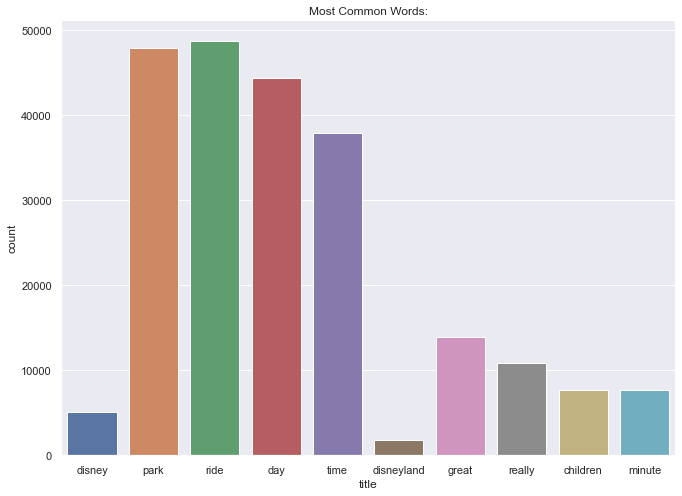

In [146]:
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.3})
sns.set(rc = {'figure.figsize':(11,8)})
sns.barplot(data=data, x="title", y="count").set(title="Most Common Words:");

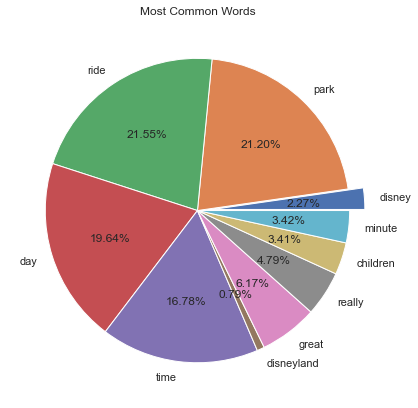

In [147]:
fig = plt.figure(figsize =(10, 7))
myexplode = [0.1, 0, 0, 0,0,0,0,0,0,0] 
plt.pie(data["count"], labels = data["title"], autopct='%1.2f%%', explode=myexplode)
plt.title("Most Common Words")

plt.show()